Input dataset; [[83 37]
 [51 86]
 [43 31]
 ...
 [ 3 15]
 [27 76]
 [91 48]]
Outputs;  [3071 4386 1333 ...   45 2052 4368]
Epoch 1/10
950/950 [==============================] - 4s 4ms/step - loss: 54.3980 - val_loss: 33.8149
Epoch 2/10
950/950 [==============================] - 4s 4ms/step - loss: 27.9794 - val_loss: 21.6953
Epoch 3/10
950/950 [==============================] - 4s 4ms/step - loss: 16.3444 - val_loss: 10.6654
Epoch 4/10
950/950 [==============================] - 4s 4ms/step - loss: 7.2626 - val_loss: 4.6966
Epoch 5/10
950/950 [==============================] - 4s 4ms/step - loss: 3.3384 - val_loss: 2.2136
Epoch 6/10
950/950 [==============================] - 4s 4ms/step - loss: 1.9272 - val_loss: 1.7085
Epoch 7/10
950/950 [==============================] - 4s 4ms/step - loss: 1.4222 - val_loss: 1.2167
Epoch 8/10
950/950 [==============================] - 4s 4ms/step - loss: 1.1547 - val_loss: 1.0873
Epoch 9/10
950/950 [==============================] - 4s 4ms/step - loss:

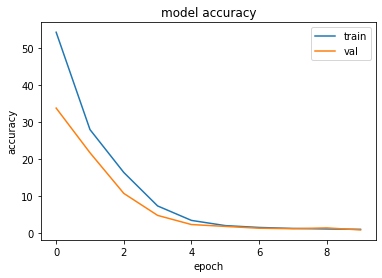

In [90]:
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from keras import Input, Model
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt

trainingInput = np.array([[random.randrange(1, 101) ,  random.randrange(1,101)] for i in range(1, 100*100*10)])
trainingOutput =  np.array([(input [0] * input [1]) for input  in trainingInput ])

print("Input dataset;", trainingInput)
print("Outputs; ", trainingOutput)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)
])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mape')

history = model.fit(trainingInput, trainingOutput, batch_size=100, validation_split=0.05, epochs=10, verbose=1, shuffle=True)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [110]:
a = np.array([[10, 2], [3.5,4], [0.5, 21], [1.5, 48.6], [25.5, 25], [-10, 10], [-5, 5]])
print(model.predict(a))

[[ 20.556545]
 [ 14.822817]
 [ 10.215759]
 [ 71.44968 ]
 [644.97015 ]
 [-80.41242 ]
 [-42.326397]]


[[0.69314718 3.87120101]
 [2.63905733 3.66356165]
 [3.29583687 4.26267988]
 ...
 [3.87120101 3.55534806]
 [4.30406509 3.87120101]
 [3.49650756 4.59511985]]
[4.56434819 6.30261898 7.55851674 ... 7.42654907 8.1752661  8.09162741]
Epoch 1/20
900/900 - 2s - loss: 1.9225 - val_loss: 0.4054
Epoch 2/20
900/900 - 2s - loss: 0.3609 - val_loss: 0.2967
Epoch 3/20
900/900 - 2s - loss: 0.2303 - val_loss: 0.1521
Epoch 4/20
900/900 - 2s - loss: 0.0863 - val_loss: 0.0363
Epoch 5/20
900/900 - 2s - loss: 0.0098 - val_loss: 7.4126e-04
Epoch 6/20
900/900 - 2s - loss: 0.0011 - val_loss: 4.8498e-04
Epoch 7/20
900/900 - 2s - loss: 8.1452e-04 - val_loss: 7.4263e-04
Epoch 8/20
900/900 - 2s - loss: 8.7848e-04 - val_loss: 6.1050e-04
Epoch 9/20
900/900 - 2s - loss: 7.7254e-04 - val_loss: 0.0018
Epoch 10/20
900/900 - 2s - loss: 9.8987e-04 - val_loss: 4.6639e-04
Epoch 11/20
900/900 - 2s - loss: 0.0011 - val_loss: 0.0013
Epoch 12/20
900/900 - 2s - loss: 9.8278e-04 - val_loss: 5.2056e-04
Epoch 13/20
900/900 - 2s - lo

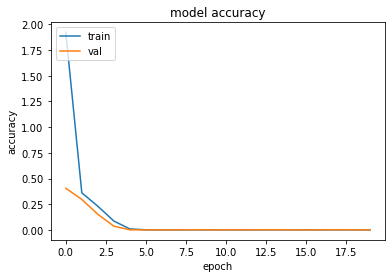

In [131]:
# Log version

import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from keras import Input, Model
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
import math

trainingInput = np.array([[math.log(random.randrange(1, 101)) ,  math.log(random.randrange(1,101))] for i in range(1, 100*100*10)])
trainingOutput =  np.array([(input [0] + input [1]) for input  in trainingInput ])

print(trainingInput)
print(trainingOutput)

log_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    tf.keras.layers.Dense(1, activation="linear"), # does only addition, so 1 neuron is sufficient
    keras.layers.Dense(1)
])

opt = keras.optimizers.Adam(learning_rate=0.0005)
log_model.compile(optimizer=opt, loss='mae')

history = log_model.fit(trainingInput, trainingOutput, batch_size=100, validation_split=0.1, epochs=20, verbose=2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [133]:
a = np.array([[math.log(0.5), math.log(21)]])
print(math.exp(log_model.predict(a)))

10.494357245504775
